In [145]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Normals
from meteostat import Stations
from meteostat import Stations, Daily
from meteostat import Stations, Monthly
import yfinance as yf
import pandas as pd
import numpy as np
import statistics as stats

In [146]:
# Import Meteostat library


# Get nearby weather stations
stations = Stations()
stations = stations.nearby(-23.567982, -46.677595)
station = stations.fetch(1)

# Print DataFrame
print(station)

                                name country region    wmo  icao  latitude  \
id                                                                           
83780  Sao Paulo/Congonhas Aeroporto      BR     SP  83780  SBSP  -23.6167   

       longitude  elevation           timezone hourly_start hourly_end  \
id                                                                       
83780     -46.65      803.0  America/Sao_Paulo   1931-01-01 2023-08-29   

      daily_start  daily_end monthly_start monthly_end     distance  
id                                                                   
83780  1940-04-01 2023-08-23    1940-01-01  2022-01-01  6103.529939  


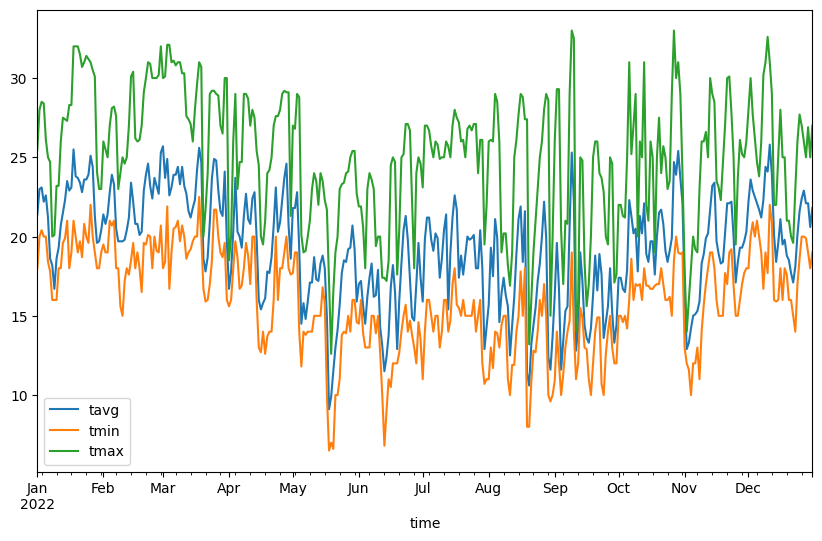

In [147]:
# Set time period
start = datetime(2022, 1, 1)
end = datetime(2022, 12, 31)

# Get daily data
clima = Daily('83780', start, end)
clima = clima.fetch()

# Plot line chart including average, minimum and maximum temperature
clima.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [148]:
clima_retornos = clima['tavg'].pct_change().dropna()

<AxesSubplot: xlabel='time'>

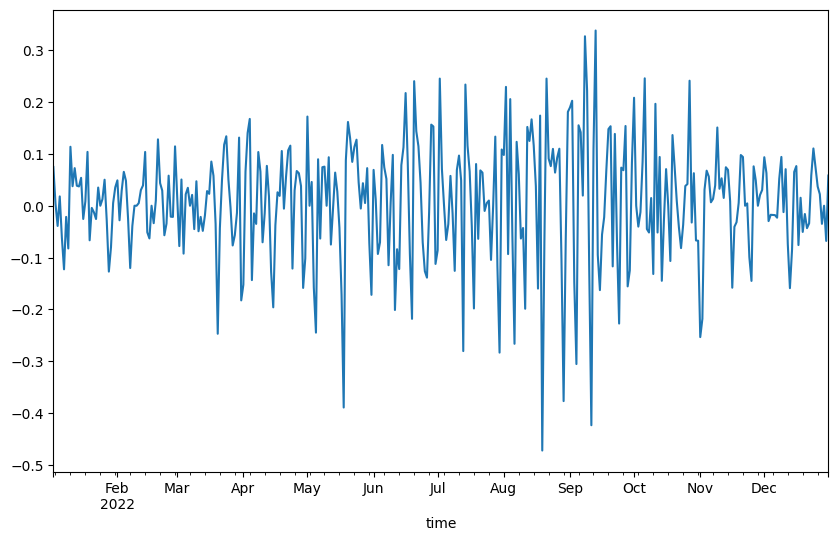

In [149]:
clima_retornos.plot()

In [150]:
data = yf.download('^BVSP', start=start,end=end)

ibov = pd.DataFrame(data)

[*********************100%***********************]  1 of 1 completed


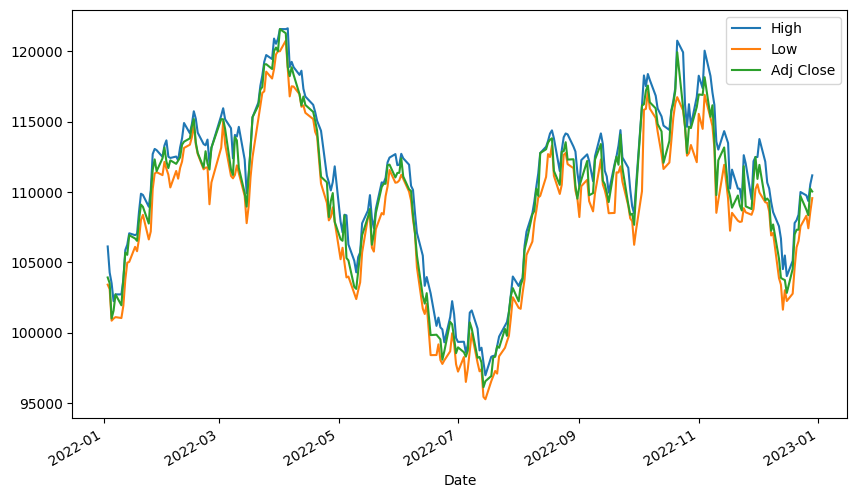

In [151]:
data.plot(y=['High', 'Low', 'Adj Close'])
plt.show()

In [152]:
ibov_retornos = ibov['Adj Close'].pct_change().dropna()
ibov_retornos

Date
2022-01-04   -0.003926
2022-01-05   -0.024229
2022-01-06    0.005495
2022-01-07    0.011402
2022-01-10   -0.007535
                ...   
2022-12-23    0.022187
2022-12-26   -0.008751
2022-12-27   -0.003596
2022-12-28    0.017444
2022-12-29   -0.001869
Name: Adj Close, Length: 249, dtype: float64

<AxesSubplot: xlabel='Date'>

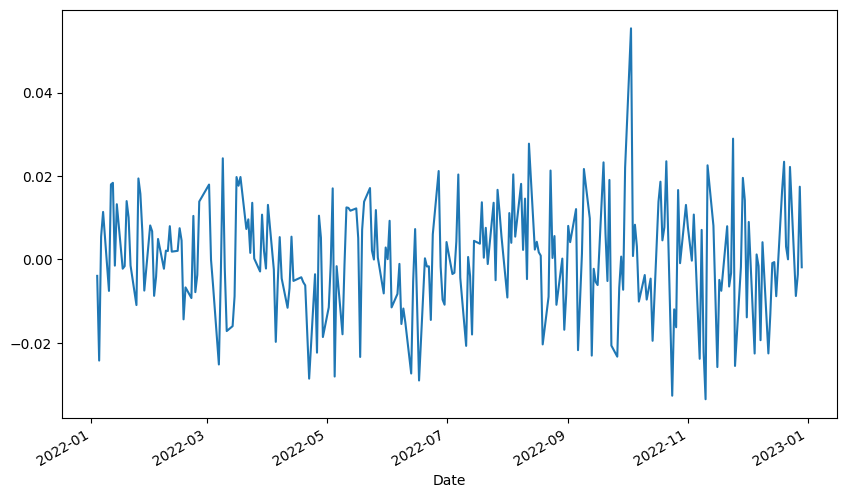

In [153]:
ibov_retornos.plot()

<AxesSubplot: xlabel='Date'>

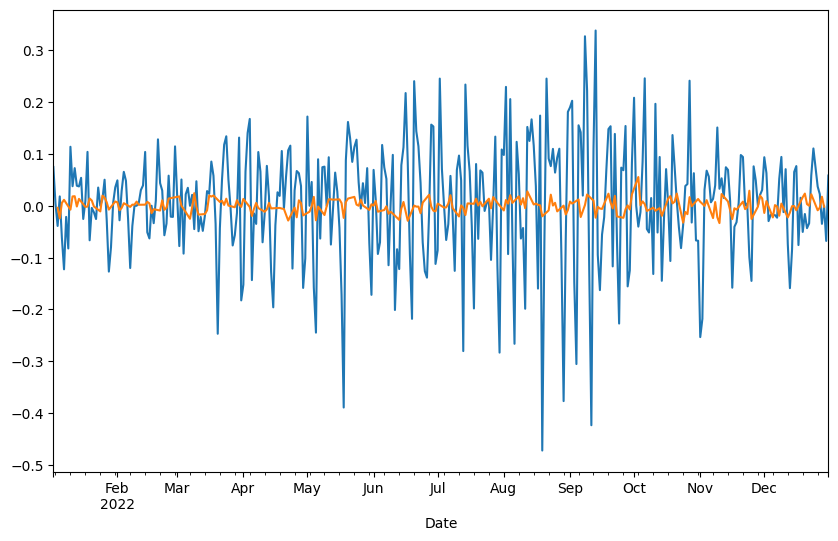

In [154]:
clima_retornos.plot()
ibov_retornos.plot()

In [155]:
np.std(clima_retornos)

0.11283761118061693

In [156]:
np.std(ibov_retornos)

0.013277050498184737

(array([ 2.,  6., 11.,  9.,  9., 12., 26., 38., 33., 26., 23., 21., 13.,
        13.,  4.,  2.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.03350062, -0.02945929, -0.02541796, -0.02137663, -0.0173353 ,
        -0.01329397, -0.00925264, -0.00521131, -0.00116998,  0.00287135,
         0.00691268,  0.01095401,  0.01499534,  0.01903667,  0.023078  ,
         0.02711933,  0.03116066,  0.03520199,  0.03924332,  0.04328465,
         0.04732598,  0.05136731,  0.05540864]),
 <BarContainer object of 22 artists>)

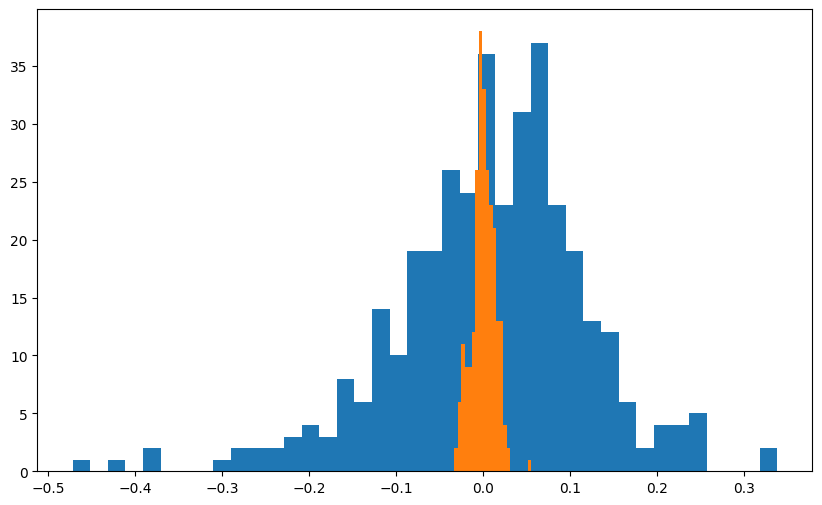

In [157]:
plt.rcParams['figure.figsize'] = (10, 6)

plt.hist(clima_retornos, bins=40)
plt.hist(ibov_retornos, bins=22)

In [158]:
mglu = yf.download('MGLU3.SA', start='2022-01-01',end='2022-12-31')
itau = yf.download('ITUB4.SA', start='2022-01-01',end='2022-12-31')
viav = yf.download('VIIA3.SA', start='2022-01-01',end='2022-12-31')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [159]:
mglu_retornos = mglu['Adj Close'].pct_change().dropna()
itau_retornos = itau['Adj Close'].pct_change().dropna()

In [160]:
np.std(mglu_retornos)

0.05180954904903224

In [161]:
np.std(itau_retornos)

0.01670257386066704

(array([ 2.,  1.,  4.,  2.,  2., 14., 20., 26., 30., 27., 33., 27., 25.,
        11., 11.,  3.,  6.,  1.,  1.,  1.,  0.,  2.]),
 array([-0.04802165, -0.04307087, -0.03812009, -0.03316931, -0.02821853,
        -0.02326775, -0.01831697, -0.01336619, -0.00841541, -0.00346463,
         0.00148615,  0.00643693,  0.01138771,  0.01633849,  0.02128927,
         0.02624005,  0.03119083,  0.03614161,  0.04109239,  0.04604317,
         0.05099395,  0.05594473,  0.06089551]),
 <BarContainer object of 22 artists>)

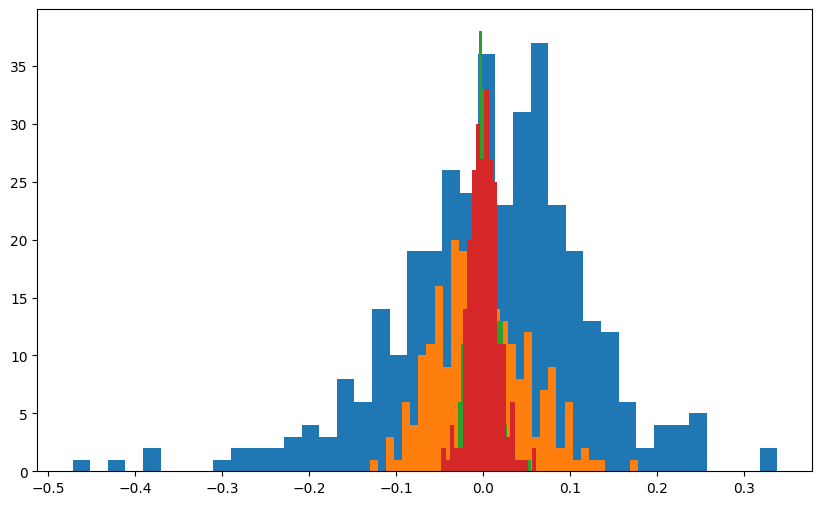

In [162]:
plt.hist(clima_retornos, bins=40)
plt.hist(mglu_retornos, bins=33)
plt.hist(ibov_retornos, bins=22)
plt.hist(itau_retornos, bins=22)

# MESES

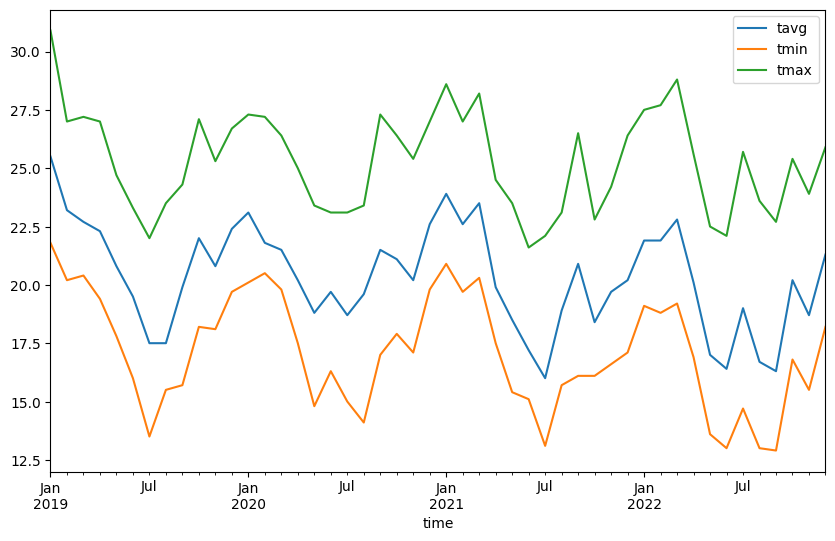

In [163]:
# Set time period
start = datetime(2019, 1, 1)
end = datetime(2022, 12, 31)

# Get daily data
clima = Monthly('83780', start, end)
clima = clima.fetch()

# Plot line chart including average, minimum and maximum temperature
clima.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [164]:
clima_retornos = clima['tavg'].pct_change().dropna()

In [165]:
data = yf.download('^BVSP', start=start,end=end, interval='1mo')

ibov = pd.DataFrame(data)

[*********************100%***********************]  1 of 1 completed


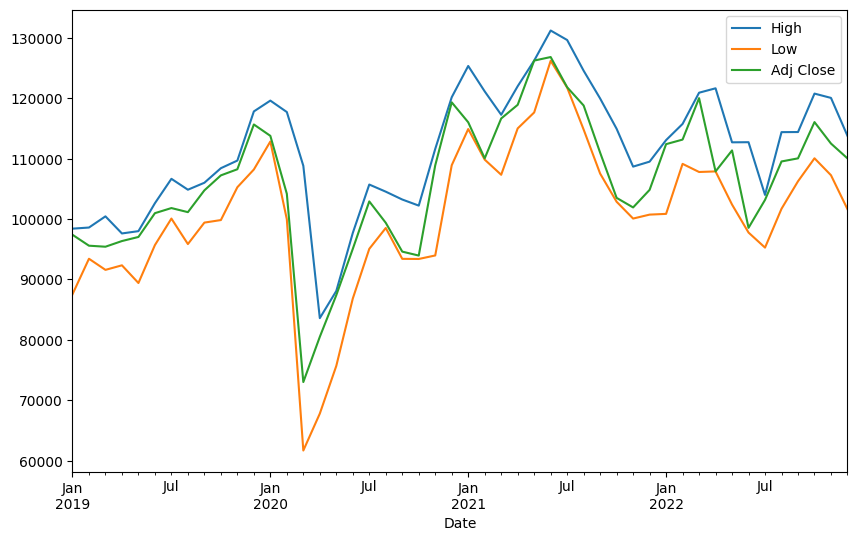

In [166]:
data.plot(y=['High', 'Low', 'Adj Close'])
plt.show()

<AxesSubplot: xlabel='Date'>

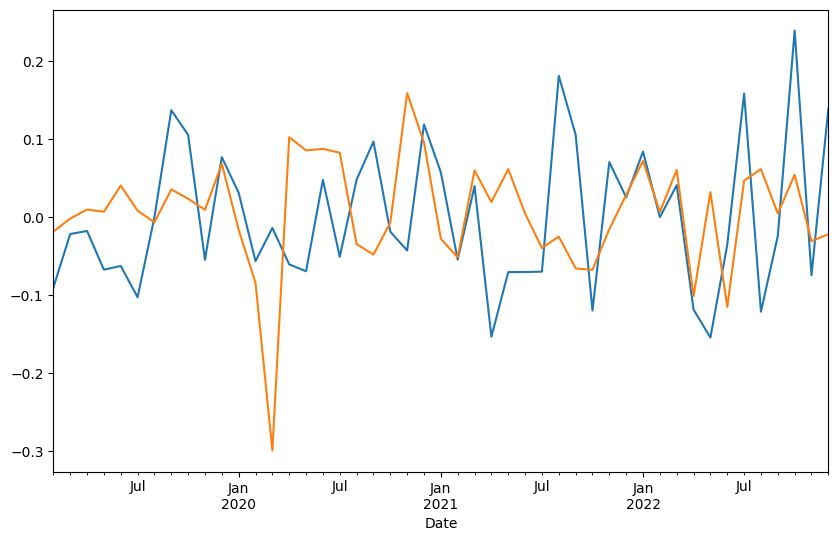

In [167]:
ibov_retornos = ibov['Adj Close'].pct_change().dropna()
clima_retornos.plot()
ibov_retornos.plot()

In [168]:
print(np.std(ibov_retornos))
print(np.std(clima_retornos))

0.0717100017197008
0.09140752690792864


In [172]:
np.corrcoef(ibov_retornos, clima_retornos)[0,1]

0.10100045110587032